In [1]:
import numpy as np

#Implementación red neuronal de dos capas con función de activación una sigmoide

def sigmoid(x):
    """Función de activación sigmoide."""
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    """Derivada de la función de activación sigmoide."""
    return x * (1 - x)

def train_neural_network(inputs, outputs, epochs, size):
    input_layer_size = 1
    hidden_layer_size = 2
    output_layer_size = 1

    # Inicialización de pesos y sesgos de manera aleatoria
    np.random.seed(1)
    weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
    biases_hidden = np.zeros((1, hidden_layer_size))
    weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))
    biases_output = np.zeros((1, output_layer_size))

    Salida=[]
    Peso_Entrada=[]
    Peso_Salida=[]
    Bia_Entrada=[]
    Bia_Salida=[]
    # Entrenamiento de la red neuronal
    for i in range(size):
        for epoch in range(epochs):
            # Capa de entrada a capa oculta
            hidden_inputs = np.dot(inputs[i], weights_input_hidden) + biases_hidden
            hidden_outputs = sigmoid(hidden_inputs)
            
            # Capa oculta a capa de salida sin sigmoide
            final_inputs = np.dot(hidden_outputs, weights_hidden_output) + biases_output
            final_outputs = final_inputs 

            # Cálculo del error
            output_error = outputs[i] - final_outputs
            hidden_error = output_error.dot(weights_hidden_output.T)

            # Retropropagación del error y actualización de pesos y sesgos
            output_delta = output_error 
            hidden_delta = hidden_error * deriv_sigmoid(hidden_outputs)

            weights_hidden_output += hidden_outputs.T.dot(output_delta)
            biases_output += np.sum(output_delta, axis=0, keepdims=True)
            weights_input_hidden += inputs[i]*(hidden_delta)
            biases_hidden += np.sum(hidden_delta, axis=0, keepdims=True) 
            if epoch < epochs: epoch= epoch + 1
            if epoch==epochs: Salida.append(final_outputs), Peso_Entrada.append(weights_input_hidden), Peso_Salida.append(weights_hidden_output), Bia_Entrada.append(biases_hidden), Bia_Salida.append(biases_output)

    print("Salida:", Salida), print("Peso Entrada:", Peso_Entrada), print("Peso Salida:",  Peso_Salida), print("Bia Entrada:",Bia_Entrada), print("Bia Salida:", Bia_Salida)
    return Salida, Peso_Entrada, Peso_Salida, Bia_Entrada, Bia_Salida
    


In [2]:
# Ejemplo 1 de entrenamiento con datos de entrada y salida variables normal gaussiana
inputs = np.random.normal(loc=0.0, scale=1.0,size=200)
outputs = np.random.normal(loc=0.0, scale=1.0, size=200)

In [3]:
# Ejemplo 2 de entrenamiento con datos de entrada y salida variables normal gaussiana
inputs2 = np.random.normal(loc=0.0, scale=1.0,size=200)
outputs2= inputs2 + 5
#outputs2 = np.random.normal(loc=5.0, scale=1.0, size=200)

In [4]:
from sklearn.model_selection import train_test_split

#Caso variables independientes

X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.2, train_size=0.8)
print('Numero de datos (input): ', inputs.shape[0])
print('Tamaño de conjunto de entrenamiento (input): ', X_train.shape[0])
print('Tamaño de conjunto de validación (input): ',X_test.shape[0])
print('Numero de datos input (output): ', outputs.shape[0])
print('Tamaño de conjunto de entrenamiento (output): ', Y_train.shape[0])
print('Tamaño de conjunto de validación (output): ',Y_test.shape[0])

Numero de datos (input):  200
Tamaño de conjunto de entrenamiento (input):  160
Tamaño de conjunto de validación (input):  40
Numero de datos input (output):  200
Tamaño de conjunto de entrenamiento (output):  160
Tamaño de conjunto de validación (output):  40


In [6]:
#Caso Variables dependientes

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(inputs2, outputs2, test_size=0.2, train_size=0.8)
#arriba era X_train2, X_test2, Y_train2, Y_test = train_test_split(inputs2, outputs2, test_size=0.2, train_size=0.8)
print('Numero de datos (input): ', inputs2.shape[0])
print('Tamaño de conjunto de entrenamiento (input): ', X_train2.shape[0])
print('Tamaño de conjunto de validación (input): ',X_test2.shape[0])
print('Numero de datos input (output): ', outputs2.shape[0])
print('Tamaño de conjunto de entrenamiento (output): ', Y_train2.shape[0])
print('Tamaño de conjunto de validación (output): ',Y_test2.shape[0])

Numero de datos (input):  200
Tamaño de conjunto de entrenamiento (input):  160
Tamaño de conjunto de validación (input):  40
Numero de datos input (output):  200
Tamaño de conjunto de entrenamiento (output):  160
Tamaño de conjunto de validación (output):  40


In [7]:
#Ejemplo 1 de red neuronal 'result'
I=X_train
O=Y_train
size=len(X_train)
epochs=30
# Entrenamiento de la red neuronal 
result = train_neural_network(I, O, epochs, size)

Salida: [array([[-0.88827868]]), array([[-0.3158494]]), array([[-1.22529602]]), array([[-0.0559293]]), array([[0.09089844]]), array([[0.04983783]]), array([[-0.18335047]]), array([[0.02995859]]), array([[-1.37934592]]), array([[-0.48082066]]), array([[0.09126607]]), array([[-0.32375405]]), array([[0.56596995]]), array([[0.20967023]]), array([[0.11786611]]), array([[-1.42908953]]), array([[2.17640889]]), array([[-0.9514039]]), array([[-0.46795128]]), array([[-0.40190479]]), array([[1.32193967]]), array([[0.90047076]]), array([[0.07030752]]), array([[0.31431536]]), array([[0.70932531]]), array([[1.5091304]]), array([[1.06989242]]), array([[-0.03734043]]), array([[-0.6447171]]), array([[1.24348038]]), array([[0.25834224]]), array([[-1.965823]]), array([[-1.8479006]]), array([[-0.36519025]]), array([[-0.08730087]]), array([[-1.06554631]]), array([[-1.71299753]]), array([[-0.97642507]]), array([[-0.67078614]]), array([[-2.9321941]]), array([[-1.52794237]]), array([[0.97019998]]), array([[0.

In [8]:
#Ejemplo 2 de red neuronal 'result'
I2=X_train2
O2=Y_train2
size2=len(X_train2)
epochs=30
# Entrenamiento de la red neuronal 
result2 = train_neural_network(I2, O2, epochs, size2)

Salida: [array([[4.41033721]]), array([[5.86353282]]), array([[4.33799562]]), array([[6.47762461]]), array([[5.27467185]]), array([[5.9761135]]), array([[7.2780641]]), array([[6.20644618]]), array([[4.94391303]]), array([[5.60282286]]), array([[5.12064357]]), array([[5.52444784]]), array([[6.47707677]]), array([[5.91792975]]), array([[5.4628818]]), array([[4.09104411]]), array([[3.52967173]]), array([[5.54358402]]), array([[5.38076295]]), array([[4.34553542]]), array([[4.28020447]]), array([[4.49590541]]), array([[4.10223901]]), array([[4.60790578]]), array([[4.34552894]]), array([[5.34160903]]), array([[5.52308194]]), array([[5.34445466]]), array([[5.98180036]]), array([[4.84366647]]), array([[5.72236266]]), array([[4.47187218]]), array([[6.00781007]]), array([[6.08738564]]), array([[5.18219518]]), array([[3.87452019]]), array([[5.89665137]]), array([[2.29112781]]), array([[7.23926105]]), array([[5.44642696]]), array([[5.69231131]]), array([[5.32977698]]), array([[5.24299316]]), array

In [9]:
#Funciones sin sigmoide dentro de la red neuronal
#Para verificar buen funcionamiento

def RedN(w1,w2,b1,b2,x):
    X1=np.dot(x,w1)+b1
    S_X1=sigmoid(X1)
    X2=np.dot(S_X1,w2)+b2
    return X1,X2

In [10]:
#derivadas para SGD

def derivate_weight(w1,w2,b1,b2,x):
    X1=np.dot(x,w1)+b1
    S_X1=sigmoid(X1)
    X2=np.dot(S_X1,w2)+b2
    D_S1=deriv_sigmoid(X1)

    D_W1=w2*D_S1*x
    D_W2=S_X1
    return D_W1,D_W2
    
def derivate_bias(w1,w2,b1,b2,x):
    X1=np.dot(x,w1)+b1
    S_X1=sigmoid(X1)
    X2=np.dot(S_X1,w2)+b2
    D_S1=deriv_sigmoid(X1)
    
    D_B1=w2*D_S1
    D_B2=1
    return D_B1, D_B2

In [11]:
#Verificando resultados de funciones derivadas
red=result
x=inputs[0]
W1=np.array(red[1][0])
w2=np.array(red[2][0])
W2=w2.flatten()
b1=np.array(red[3][0])
b2=red[4][0].item()
print(W1,W2,b1,b2)

derivada_peso= derivate_weight(W1,W2,b1,b2,x)
derivada_bias= derivate_bias(W1,W2,b1,b2,x)
funcion=RedN(W1,W2,b1,b2,x)
print("Derivada Peso:", derivada_peso[0], derivada_peso[1])
print("Derivada Bias:", derivada_bias[0], derivada_bias[1])
print("Valores Capas", funcion)

[[-0.11857489 -0.09845298]] [-0.12372544 -0.09713193] [[-2.802606   -2.86195867]] -0.512006558142571
Derivada Peso: [[-2.14915878 -1.79834466]] [[0.07046683 0.0643595 ]]
Derivada Bias: [[1.14242736 0.95594525]] 1
Valores Capas (array([[-2.57954037, -2.67674682]]), array([-0.52697646]))


In [12]:
import numpy as np

# SGD implementado 

def sgd_regression(red, learning_rate, X_train, Y_train):
    log_train=[]
    shuffle_indices = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[shuffle_indices]
    Y_train_shuffled = Y_train[shuffle_indices]

    w1=np.array(red[1][0])
    W1=w1.flatten()
    w2=np.array(red[2][0])
    W2=w2.flatten()
    b_1=np.array(red[3][0])
    b1=b_1.flatten()
    b2=red[4][0].item()
    train_cost = 0
    
    for i in range(X_train_shuffled.shape[0]):
        xi = X_train_shuffled[i]
        yi = Y_train_shuffled[i]

        X1=np.dot(x,W1)+b1
        Y1=sigmoid(X1)
        X2=np.dot(Y1,W2)+b2
        Y2=X2
        # Realiza la predicción
        y_pred = Y2         #f_theta red neuronal
        # Calcula el error
        error = y_pred - yi
        # Calcula los gradientes
        d_weight1 = 2 * error * derivate_weight(W1,W2,b1,b2,xi)[0]
        d_weight2 = 2 * error*derivate_weight(W1,W2,b1,b2,xi)[1]
        d_bias1 = 2 * error* derivate_bias(W1,W2,b1,b2,xi)[0]
        d_bias2 = 2 * error* derivate_bias(W1,W2,b1,b2,xi)[1]
        # Actualiza los pesos y el sesgo
        W1 -= learning_rate * d_weight1
        W2 -= learning_rate * d_weight2
        b1 -= learning_rate * d_bias1
        b2 -= learning_rate * d_bias2
         #Calcula el costo de entrenamiento
        train_cost += error ** 2
        # Calcula el costo promedio en entrenamiento
        train_cost /= (i+1)
        log_train.append(train_cost)

        print(f'Epoch {i}/{X_train_shuffled.shape[0]}: Train Cost = {train_cost}')
        
    return W1, W2, b1, b2, print("Peso entrada", W1, "Bia Entrada", b1, "Peso Salida", W2, "Bia Salida", b2), log_train

In [13]:
#Funcion Red Neuronal con theta mínimo
# Caso variables normales

def Funcion_theta(X, Peso1, Peso2, Bia1, Bia2):
    lista_ordenada=sorted(X)
    funcion=[]
    log_test=[]
    for i in range(len(X)):
        x=lista_ordenada[i]
        X1=np.dot(x,W1)+b1
        Y1=sigmoid(X1)
        X2=np.dot(Y1,W2)+b2
        Y2=X2
        y=Y2.flatten()
        funcion.append(y)
         # Calcula el costo en el conjunto de prueba
        test_output=y
        test_cost = np.mean((test_output - Y_test) ** 2)
        log_test.append(test_cost)
    return funcion, log_test


In [14]:
#Aplicamos SGD Ejemplo 1
r=result
learning_rate=0.0001

peso1=sgd_regression(r, learning_rate, X_train, Y_train)[0]
#print("Peso1:", Peso1)
peso2=sgd_regression(r, learning_rate, X_train, Y_train)[1]
#print("Peso2:", Peso2)
bia1=sgd_regression(r, learning_rate, X_train, Y_train)[2]
#print("Bia1:", Bia1)
bia2=sgd_regression(r, learning_rate, X_train, Y_train)[3]
#print("Bia2:", Bia2)

Grafico=Funcion_theta(X_test, peso1, peso2, bia1, bia2)
#print("Grafico:", Grafico)

Epoch 0/160: Train Cost = 0.14989051223796074
Epoch 1/160: Train Cost = 0.16366088057041042
Epoch 2/160: Train Cost = 0.054561136323197146
Epoch 3/160: Train Cost = 1.2815528920157864
Epoch 4/160: Train Cost = 1.4679195061139874
Epoch 5/160: Train Cost = 0.25146167874448555
Epoch 6/160: Train Cost = 0.047244190566426494
Epoch 7/160: Train Cost = 0.042324748749251
Epoch 8/160: Train Cost = 0.004704539463550674
Epoch 9/160: Train Cost = 0.04191167964453785
Epoch 10/160: Train Cost = 0.024270316399782044
Epoch 11/160: Train Cost = 0.002390900670676158
Epoch 12/160: Train Cost = 0.1236369612615342
Epoch 13/160: Train Cost = 0.009920989443655775
Epoch 14/160: Train Cost = 0.07624985352615024
Epoch 15/160: Train Cost = 0.006191230405025005
Epoch 16/160: Train Cost = 0.10915309612684679
Epoch 17/160: Train Cost = 0.08048376018539896
Epoch 18/160: Train Cost = 0.18051501752268856
Epoch 19/160: Train Cost = 0.03058262773898751
Epoch 20/160: Train Cost = 0.054581743707246166
Epoch 21/160: Train 

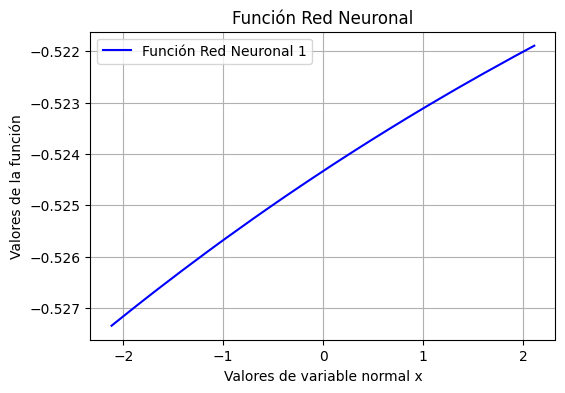

In [15]:
#Graficar red neuronal con theta mínimo obtenido por SGD
#Ejemplo 1
import matplotlib.pyplot as plt

# Crear un rango de iteraciones para el eje x
EjeX=sorted(X_test)
NN=Grafico[0]
# Graficar las curvas de costo
plt.figure(figsize=(6, 4))
plt.plot(EjeX, NN, label='Función Red Neuronal 1', color='blue')
plt.xlabel('Valores de variable normal x')
plt.ylabel('Valores de la función')
plt.title('Función Red Neuronal')
plt.legend()
plt.grid()
plt.show()

In [16]:
#Aplicamos SGD Ejemplo 2
R=result2
learning_rate=0.0001

Peso_1=sgd_regression(R, learning_rate, X_train2, Y_train2)[0]
#print("Peso1:", Peso1)
Peso_2=sgd_regression(R, learning_rate, X_train2, Y_train2)[1]
#print("Peso2:", Peso2)
Bia_1=sgd_regression(R, learning_rate, X_train2, Y_train2)[2]
#print("Bia1:", Bia1)
Bia_2=sgd_regression(R, learning_rate, X_train2, Y_train2)[3]
#print("Bia2:", Bia2)

Grafico2=Funcion_theta(X_test2, Peso_1, Peso_2, Bia_1, Bia_2)
#print("Grafico:", Grafico2)

Epoch 0/160: Train Cost = 2.986956119767567
Epoch 1/160: Train Cost = 4.158664369574448
Epoch 2/160: Train Cost = 1.3977213341754469
Epoch 3/160: Train Cost = 1.0031454485566693
Epoch 4/160: Train Cost = 1.284370613525439
Epoch 5/160: Train Cost = 1.0079209440936652
Epoch 6/160: Train Cost = 0.14516731898069307
Epoch 7/160: Train Cost = 0.1145263840559346
Epoch 8/160: Train Cost = 0.4252008521759146
Epoch 9/160: Train Cost = 0.1318959343914085
Epoch 10/160: Train Cost = 0.0833114197484507
Epoch 11/160: Train Cost = 0.44320105647513613
Epoch 12/160: Train Cost = 0.09055372344889502
Epoch 13/160: Train Cost = 0.1508938644640146
Epoch 14/160: Train Cost = 0.5177987261093194
Epoch 15/160: Train Cost = 0.40723349338176584
Epoch 16/160: Train Cost = 0.09748007469467859
Epoch 17/160: Train Cost = 0.08206752750072836
Epoch 18/160: Train Cost = 0.0394024222753507
Epoch 19/160: Train Cost = 0.34390034263068203
Epoch 20/160: Train Cost = 0.16762233601080448
Epoch 21/160: Train Cost = 0.0252119466

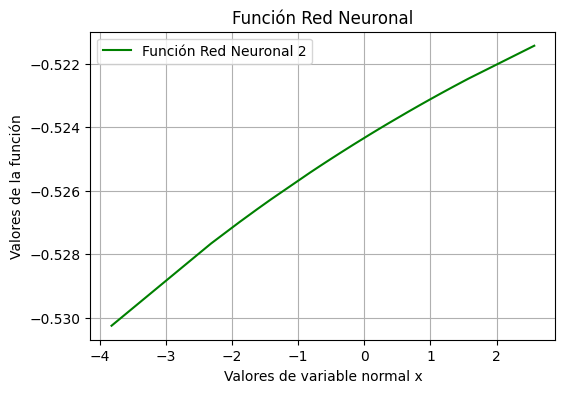

In [17]:
#Graficar red neuronal con theta mínimo obtenido por SGD
import matplotlib.pyplot as plt

# Crear un rango de iteraciones para el eje x
EjeX2=sorted(X_test2)
NN2=Grafico2[0]
# Graficar las curvas de costo
plt.figure(figsize=(6, 4))
plt.plot(EjeX2, NN2, label='Función Red Neuronal 2', color='green')
plt.xlabel('Valores de variable normal x')
plt.ylabel('Valores de la función')
plt.title('Función Red Neuronal')
plt.legend()
plt.grid()
plt.show()

$\underline{{\bf\mbox{ Distribución Normal Bivariada}:}}$

Las variables aleatorias $X$ e $Y$ tienen una distribución normal bivariada si su función de densidad de probabilidad conjunta está dada por
$$f(x,y)=\dfrac{1}{2\pi\sigma_X\sigma_Y\sqrt{1-\rho^2}}\exp\left(-\dfrac{1}{2(1-\rho^2)}\left[\left(\dfrac{x-\mu_X}{\sigma_X}\right)^2-2\rho\left(\dfrac{x-\mu_X}{\sigma_X}\right)\left(\dfrac{y-\mu_Y}{\sigma_Y}\right)+\left(\dfrac{y-\mu_Y}{\sigma_Y}\right)^2\right]\right) $$
donde $\mu_X=\mathbb{E}(X)$, $\mu_Y=\mathbb{E}(Y)$, $\sigma_X^2=Var(X)$, $\sigma_Y^2=Var(Y)$.

El coeficiente de correlación está dado por:
$$\rho_{X,Y}=\dfrac{\mathbb{E}(XY)-\mathbb{E}(X)\mathbb{E}(Y)}{\sqrt{\mathbb{E}(X^2)-\mathbb{E}(X)^2}\cdot \sqrt{\mathbb{E}(Y^2)-\mathbb{E}(Y)^2}} $$
Si $\rho=0$ las variables son independientes. Se tiene que $-1\leq \rho \leq 1$.

La función de densidad de probabilidad condicional $f(y|x)=\dfrac{f(x,y)}{f_X(x)}$ con $f_X(x)>0$ es

$$f(y|x)=\dfrac{1}{\sqrt{2\pi\sigma_Y^2(1-\rho^2)}}\, \exp\left(-\dfrac{1}{2\sigma_Y^2(1-\rho^2)}\left[y-\mu_Y-\dfrac{\rho\sigma_Y}{\sigma_X}(x-\mu_X)\right]^2\right) $$

Luego:

$$\mathbb{E}(Y|X=x)= \displaystyle{\int_{-\infty}^{\infty}yf(y|x)dy} = \mu_Y + \dfrac{\rho\sigma_Y}{\sigma_X}(x-\mu_X) $$


Como ejemplos consideraremos los siguientes casos:

1. La media $\mu_Y=0,\mu_X=0$, la varianza $\sigma_X^2=\sigma_Y^2=1$ y $\rho=0$ (las variables son independientes). En este caso $\mathbb{E}(Y|X=x)=0$.

1. La media $\mu_Y=5,\mu_X=0$, la varianza $\sigma_X^2=\sigma_Y^2=1$ y $\rho=1$ (las variables son dependientes) tenemos que la esperanza condicional es:
$$\mathbb{E}(Y|X=x)= 5 + x$$



In [18]:
#Función Esperanza Condicional Variables Normal para Ejemplo 1

def EsperanzaCondicional(X):
    funcion=[]
    for i in range(len(X)):
        y=0
        funcion.append(y)
    return funcion

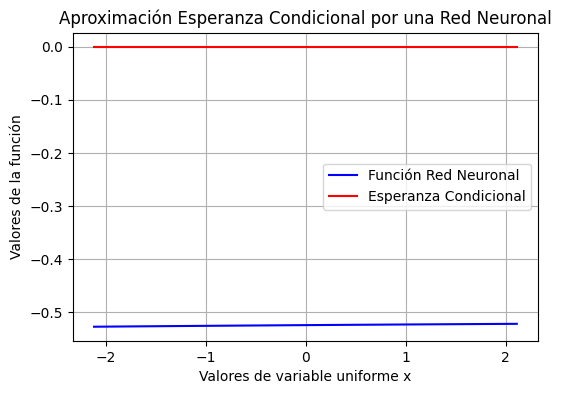

In [19]:
#Graficar red neuronal con theta mínimo obtenido por SGD vs Esperanza Condicional Ejemplo 1
import matplotlib.pyplot as plt

# Crear un rango de iteraciones para el eje x
EjeX=sorted(X_test)
EspCond=EsperanzaCondicional(X_test)
# Graficar las curvas de costo
plt.figure(figsize=(6, 4))
plt.plot(EjeX, NN, label='Función Red Neuronal', color='blue')
plt.plot(EjeX, EspCond, label='Esperanza Condicional', color='red')
plt.xlabel('Valores de variable uniforme x')
plt.ylabel('Valores de la función')
plt.title('Aproximación Esperanza Condicional por una Red Neuronal')
plt.legend()
plt.grid()
plt.show()

In [20]:
def EsperanzaCondicional1(X):
    funcion=[]
    S=sorted(X)
    for i in range(len(X)):
        y=5+(S[i])
        funcion.append(y)
    return funcion

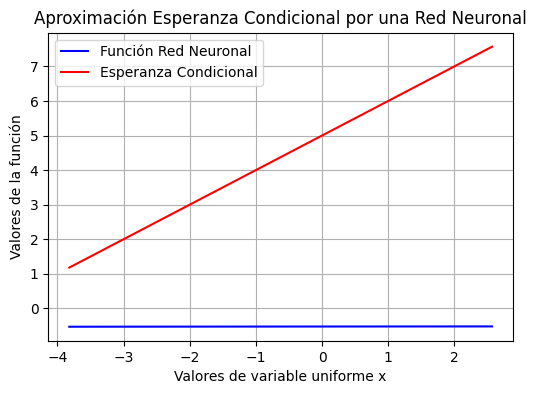

In [21]:
#Graficar red neuronal con theta mínimo obtenido por SGD vs Esperanza Condicional para Ejemplo 2
import matplotlib.pyplot as plt

# Crear un rango de iteraciones para el eje x
EjeX2=sorted(X_test2)
EspCond2=EsperanzaCondicional1(X_test2)
# Graficar las curvas de costo
plt.figure(figsize=(6, 4))
plt.plot(EjeX2, NN2, label='Función Red Neuronal', color='blue')
plt.plot(EjeX2, EspCond2, label='Esperanza Condicional', color='red')
plt.xlabel('Valores de variable uniforme x')
plt.ylabel('Valores de la función')
plt.title('Aproximación Esperanza Condicional por una Red Neuronal')
plt.legend()
plt.grid()
plt.show()

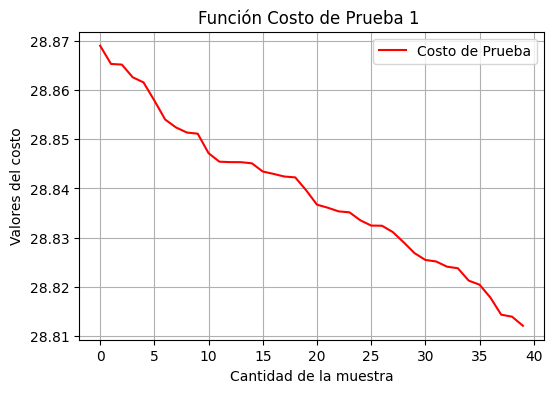

In [22]:
#Gráfico función de costo empírico Ejemplo 1

# Crear un rango de iteraciones para el eje x
#n_iterations = len(X_train)
#iterations1 = range(n_iterations)
m_iterations=len(X_test)
iterations = range(m_iterations)
#Entrenamiento=Graf[5]
Test=Grafico[1]
# Graficar las curvas de costo
plt.figure(figsize=(6, 4))
#plt.plot(EjeX, Entrenamiento , label='Costo de Entrenamiento', color='blue')
plt.plot(iterations ,Test , label='Costo de Prueba', color='red')
plt.xlabel('Cantidad de la muestra')
plt.ylabel('Valores del costo')
plt.title('Función Costo de Prueba 1 ')
plt.legend()
plt.grid()
plt.show()

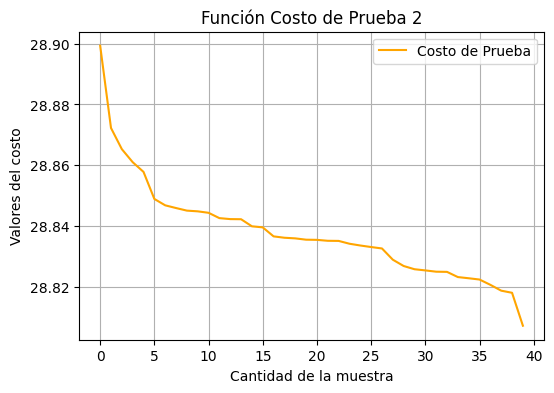

In [23]:
#Gráfico función de costo empírico Ejemplo 2

# Crear un rango de iteraciones para el eje x
#n_iterations = len(X_train)
#iterations1 = range(n_iterations)
n_iterations2=len(X_test2)
iterations2 = range(n_iterations2)
#Entrenamiento=Graf[5]
Test2=Grafico2[1]
# Graficar las curvas de costo
plt.figure(figsize=(6, 4))
#plt.plot(EjeX, Entrenamiento , label='Costo de Entrenamiento', color='blue')
plt.plot(iterations2 ,Test2 , label='Costo de Prueba', color='orange')
plt.xlabel('Cantidad de la muestra')
plt.ylabel('Valores del costo')
plt.title('Función Costo de Prueba 2')
plt.legend()
plt.grid()
plt.show()

Conclusión: Notamos que hay un sobreajuste porque la red neuronal no se mueve más cerca de la esperanza condicional que es lo que está aproximando. No se acerca a la recta (esperanza condicional) en el caso 2.
No podemos darle mucha profundidad sino no se obtienen datos (tomamos profundidad 2 solamente). No hay muchos cambios si aumentamos la muestra.
Quizás conviene aproximar por una red neuronal con más capas o con otra función de activación.
